#### Importing required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#### Reading the data

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Inspecting the data to understand the structure of the data

In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

After inspecting the data, we see that there are some fields that have null values in them. Now we'll check if there is any categorical variable whose categories are numeric.

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are some variables which are categorical but the categories are numeric in nature.

#### Looking the null value percentage in every column

In [6]:
round(data.isnull().sum()/len(data.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

#### Dropping the columns which contain more than 40% null values

In [7]:
data = data.drop(data.loc[:,(round(data.isnull().sum()/len(data.index)*100,2))>40], axis=1)

Inspecting the DataFrame after dropping the columns containing high percentage of null values

In [8]:
data.shape

(1460, 76)

Now we'll drop those rows which contain more than 5 null variables

In [9]:
data=data.loc[~((data.isnull().sum(axis=1))>5)]

In [10]:
data.shape

(1440, 76)

We are now having a Dataframe with 76 variables and with 1440 records/observations

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1459
Data columns (total 76 columns):
Id               1440 non-null int64
MSSubClass       1440 non-null int64
MSZoning         1440 non-null object
LotFrontage      1194 non-null float64
LotArea          1440 non-null int64
Street           1440 non-null object
LotShape         1440 non-null object
LandContour      1440 non-null object
Utilities        1440 non-null object
LotConfig        1440 non-null object
LandSlope        1440 non-null object
Neighborhood     1440 non-null object
Condition1       1440 non-null object
Condition2       1440 non-null object
BldgType         1440 non-null object
HouseStyle       1440 non-null object
OverallQual      1440 non-null int64
OverallCond      1440 non-null int64
YearBuilt        1440 non-null int64
YearRemodAdd     1440 non-null int64
RoofStyle        1440 non-null object
RoofMatl         1440 non-null object
Exterior1st      1440 non-null object
Exterior2nd      1440 non

In [12]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1440.000000,1440.000000,1194.00000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1432.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,730.111111,56.826389,70.08459,10542.294444,6.128472,5.584028,1971.613194,1985.207639,104.895950,448.313194,...,95.188194,46.987500,21.822917,3.456944,15.270139,2.797222,40.829167,6.338889,2007.818750,182110.622222
std,421.870004,42.016548,24.33991,10043.775272,1.361955,1.101466,30.179237,20.504324,181.823951,456.897567,...,125.718074,66.417739,60.893816,29.517587,56.115078,40.454221,490.200145,2.708007,1.326926,79258.545115
min,1.000000,20.000000,21.00000,1300.000000,2.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.750000,20.000000,59.00000,7560.000000,5.000000,5.000000,1954.000000,1967.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130437.500000
50%,730.500000,50.000000,69.50000,9500.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,387.500000,...,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164250.000000
75%,1095.250000,70.000000,80.00000,11618.250000,7.000000,6.000000,2001.000000,2004.000000,168.000000,719.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214925.000000
max,1460.000000,190.000000,313.00000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### We'll check the skewness of the data in the categorical variables and if the data is highly skewed in any categorical column, we'll add those variables into a separate list so that those can be treated later.

In [13]:
data.OverallQual.value_counts(normalize=True)

5     0.270833
6     0.259028
7     0.221528
8     0.116667
4     0.075694
9     0.029861
10    0.012500
3     0.011806
2     0.002083
Name: OverallQual, dtype: float64

In [14]:
data.OverallCond.value_counts(normalize=True)

5    0.564583
6    0.173611
7    0.140278
8    0.049306
4    0.038194
9    0.015278
3    0.015278
2    0.003472
Name: OverallCond, dtype: float64

In [15]:
data.MSSubClass.value_counts(normalize=True)

20     0.365972
60     0.206944
50     0.098611
120    0.060417
30     0.046528
160    0.043750
70     0.041667
80     0.040278
90     0.034028
190    0.018750
85     0.013889
75     0.011111
45     0.008333
180    0.006944
40     0.002778
Name: MSSubClass, dtype: float64

In [16]:
data.MSZoning.value_counts(normalize=True)

RL         0.788194
RM         0.149306
FV         0.045139
RH         0.010417
C (all)    0.006944
Name: MSZoning, dtype: float64

As the data in the variable MSZoning is highly skewed, we add this variable into list skewed

In [17]:
skewed=[]
skewed.append('MSZoning')

In [18]:
data.Street.value_counts(normalize=True)

Pave    0.995833
Grvl    0.004167
Name: Street, dtype: float64

In [19]:
skewed.append('Street')

In [20]:
data.LotShape.value_counts(normalize=True)

Reg    0.634722
IR1    0.330556
IR2    0.027778
IR3    0.006944
Name: LotShape, dtype: float64

In [21]:
data.LandContour.value_counts(normalize=True)

Lvl    0.897917
Bnk    0.043750
HLS    0.034722
Low    0.023611
Name: LandContour, dtype: float64

In [22]:
skewed.append('LandContour')

In [23]:
data.Utilities.value_counts(normalize=True)

AllPub    0.999306
NoSeWa    0.000694
Name: Utilities, dtype: float64

In [24]:
skewed.append('Utilities')

In [25]:
data.LotConfig.value_counts(normalize=True)

Inside     0.722222
Corner     0.178472
CulDSac    0.063889
FR2        0.032639
FR3        0.002778
Name: LotConfig, dtype: float64

In [26]:
skewed.append('LotConfig')

In [27]:
data.LandSlope.value_counts(normalize=True)

Gtl    0.947222
Mod    0.044444
Sev    0.008333
Name: LandSlope, dtype: float64

In [28]:
skewed.append('LandSlope')

In [29]:
data.Neighborhood.value_counts(normalize=True)

NAmes      0.154167
CollgCr    0.104167
OldTown    0.077778
Edwards    0.065278
Somerst    0.059722
Gilbert    0.054167
NridgHt    0.053472
NWAmes     0.050694
Sawyer     0.050694
SawyerW    0.040972
BrkSide    0.037500
Crawfor    0.035417
Mitchel    0.033333
NoRidge    0.028472
Timber     0.026389
IDOTRR     0.024306
ClearCr    0.019444
StoneBr    0.017361
SWISU      0.016667
MeadowV    0.011806
Blmngtn    0.011806
BrDale     0.011111
Veenker    0.007639
NPkVill    0.006250
Blueste    0.001389
Name: Neighborhood, dtype: float64

In [30]:
data.Condition1.value_counts(normalize=True)

Norm      0.863889
Feedr     0.054167
Artery    0.032639
RRAn      0.018056
PosN      0.013194
RRAe      0.007639
PosA      0.005556
RRNn      0.003472
RRNe      0.001389
Name: Condition1, dtype: float64

In [31]:
skewed.append('Condition1')

In [32]:
data.Condition2.value_counts(normalize=True)

Norm      0.989583
Feedr     0.004167
PosN      0.001389
RRNn      0.001389
Artery    0.001389
RRAe      0.000694
PosA      0.000694
RRAn      0.000694
Name: Condition2, dtype: float64

In [33]:
skewed.append('Condition2')

In [34]:
data.BldgType.value_counts(normalize=True)

1Fam      0.837500
TwnhsE    0.079167
Duplex    0.034028
Twnhs     0.029861
2fmCon    0.019444
Name: BldgType, dtype: float64

In [35]:
skewed.append('BldgType')

In [36]:
data.HouseStyle.value_counts(normalize=True)

1Story    0.494444
2Story    0.306250
1.5Fin    0.105556
SLvl      0.045139
SFoyer    0.025694
1.5Unf    0.009722
2.5Unf    0.007639
2.5Fin    0.005556
Name: HouseStyle, dtype: float64

In [37]:
data.OverallQual.value_counts(normalize=True)

5     0.270833
6     0.259028
7     0.221528
8     0.116667
4     0.075694
9     0.029861
10    0.012500
3     0.011806
2     0.002083
Name: OverallQual, dtype: float64

In [38]:
data.OverallCond.value_counts(normalize=True)

5    0.564583
6    0.173611
7    0.140278
8    0.049306
4    0.038194
9    0.015278
3    0.015278
2    0.003472
Name: OverallCond, dtype: float64

In [39]:
data.RoofStyle.value_counts(normalize=True)

Gable      0.781250
Hip        0.195833
Flat       0.009028
Gambrel    0.007639
Mansard    0.004861
Shed       0.001389
Name: RoofStyle, dtype: float64

In [40]:
skewed.append('RoofStyle')

In [41]:
data.RoofMatl.value_counts(normalize=True)

CompShg    0.981944
Tar&Grv    0.007639
WdShngl    0.004167
WdShake    0.003472
Roll       0.000694
Metal      0.000694
ClyTile    0.000694
Membran    0.000694
Name: RoofMatl, dtype: float64

In [42]:
skewed.append('RoofMatl')

In [43]:
data.Exterior1st.value_counts(normalize=True)

VinylSd    0.354861
HdBoard    0.152778
MetalSd    0.150694
Wd Sdng    0.140278
Plywood    0.074306
CemntBd    0.042361
BrkFace    0.034028
WdShing    0.017361
Stucco     0.016667
AsbShng    0.012500
Stone      0.001389
BrkComm    0.001389
CBlock     0.000694
ImStucc    0.000694
Name: Exterior1st, dtype: float64

In [44]:
data.Exterior2nd.value_counts(normalize=True)

VinylSd    0.347917
MetalSd    0.146528
HdBoard    0.143056
Wd Sdng    0.134028
Plywood    0.095833
CmentBd    0.041667
Wd Shng    0.025000
Stucco     0.017361
BrkFace    0.017361
AsbShng    0.013194
ImStucc    0.006944
Brk Cmn    0.004861
Stone      0.003472
AsphShn    0.001389
CBlock     0.000694
Other      0.000694
Name: Exterior2nd, dtype: float64

In [45]:
data.MasVnrType.value_counts(normalize=True)

None       0.590084
BrkFace    0.310056
Stone      0.089385
BrkCmn     0.010475
Name: MasVnrType, dtype: float64

In [46]:
data.ExterQual.value_counts(normalize=True)

TA    0.617361
Gd    0.338889
Ex    0.036111
Fa    0.007639
Name: ExterQual, dtype: float64

In [47]:
data.ExterCond.value_counts(normalize=True)

TA    0.879861
Gd    0.100694
Fa    0.016667
Ex    0.002083
Po    0.000694
Name: ExterCond, dtype: float64

In [48]:
skewed.append('ExterCond')

In [49]:
data.Foundation.value_counts(normalize=True)

PConc     0.447917
CBlock    0.435417
BrkTil    0.100000
Slab      0.010417
Stone     0.004167
Wood      0.002083
Name: Foundation, dtype: float64

In [50]:
data.BsmtQual.value_counts(normalize=True)

TA    0.454096
Gd    0.436441
Ex    0.085452
Fa    0.024011
Name: BsmtQual, dtype: float64

In [51]:
data.BsmtCond.value_counts(normalize=True)

TA    0.921610
Gd    0.045904
Fa    0.031780
Po    0.000706
Name: BsmtCond, dtype: float64

In [52]:
skewed.append('BsmtCond')

In [53]:
data.BsmtExposure.value_counts(normalize=True)

No    0.669965
Av    0.156184
Gd    0.093993
Mn    0.079859
Name: BsmtExposure, dtype: float64

In [54]:
data.BsmtFinType1.value_counts(normalize=True)

Unf    0.302260
GLQ    0.294492
ALQ    0.154661
BLQ    0.103107
Rec    0.093220
LwQ    0.052260
Name: BsmtFinType1, dtype: float64

In [55]:
data.BsmtFinType2.value_counts(normalize=True)

Unf    0.882686
Rec    0.038163
LwQ    0.032509
BLQ    0.023322
ALQ    0.013428
GLQ    0.009894
Name: BsmtFinType2, dtype: float64

In [56]:
skewed.append('BsmtFinType2')

In [57]:
data.Heating.value_counts(normalize=True)

GasA    0.979167
GasW    0.012500
Grav    0.004861
Wall    0.002083
OthW    0.001389
Name: Heating, dtype: float64

In [58]:
skewed.append('Heating')

In [59]:
data.HeatingQC.value_counts(normalize=True)

Ex    0.512500
TA    0.290972
Gd    0.163889
Fa    0.031944
Po    0.000694
Name: HeatingQC, dtype: float64

In [60]:
data.CentralAir.value_counts(normalize=True)

Y    0.940972
N    0.059028
Name: CentralAir, dtype: float64

In [61]:
skewed.append('CentralAir')

In [62]:
data.Electrical.value_counts(normalize=True)

SBrkr    0.918694
FuseA    0.061154
FuseF    0.018068
FuseP    0.001390
Mix      0.000695
Name: Electrical, dtype: float64

In [63]:
skewed.append('Electrical')

In [64]:
data.KitchenQual.value_counts(normalize=True)

TA    0.500000
Gd    0.406944
Ex    0.069444
Fa    0.023611
Name: KitchenQual, dtype: float64

In [65]:
data.Functional.value_counts(normalize=True)

Typ     0.933333
Min2    0.022222
Min1    0.021528
Mod     0.009722
Maj1    0.009028
Maj2    0.003472
Sev     0.000694
Name: Functional, dtype: float64

In [66]:
skewed.append('Functional')

In [67]:
data.GarageType.value_counts(normalize=True)

Attchd     0.631464
Detchd     0.279680
BuiltIn    0.064093
Basment    0.013838
CarPort    0.006555
2Types     0.004370
Name: GarageType, dtype: float64

In [68]:
data.GarageFinish.value_counts(normalize=True)

Unf    0.436999
RFn    0.306628
Fin    0.256373
Name: GarageFinish, dtype: float64

In [69]:
data.GarageQual.value_counts(normalize=True)

TA    0.950473
Fa    0.034960
Gd    0.010197
Po    0.002185
Ex    0.002185
Name: GarageQual, dtype: float64

In [70]:
skewed.append('GarageQual')

In [71]:
data.GarageCond.value_counts(normalize=True)

TA    0.962127
Fa    0.024763
Gd    0.006555
Po    0.005098
Ex    0.001457
Name: GarageCond, dtype: float64

In [72]:
skewed.append('GarageCond')

In [73]:
data.PavedDrive.value_counts(normalize=True)

Y    0.923611
N    0.056250
P    0.020139
Name: PavedDrive, dtype: float64

In [74]:
skewed.append('PavedDrive')

In [75]:
data.SaleType.value_counts(normalize=True)

WD       0.865972
New      0.084722
COD      0.029861
ConLD    0.006250
ConLw    0.003472
ConLI    0.003472
CWD      0.002778
Oth      0.002083
Con      0.001389
Name: SaleType, dtype: float64

In [76]:
skewed.append('SaleType')

In [77]:
data.SaleCondition.value_counts(normalize=True)

Normal     0.819444
Partial    0.086806
Abnorml    0.069444
Family     0.013889
Alloca     0.008333
AdjLand    0.002083
Name: SaleCondition, dtype: float64

In [78]:
skewed.append('SaleCondition')

In [79]:
skewed.append('KitchenAbvGr')

#### Dropping the highly skewed columns

In [80]:
data=data.drop(skewed,axis=1)

In [81]:
data.shape

(1440, 52)

After dropping all the variables for which the data was highly skewed, we are left with 52 variables.

# Exploratory Data Analysis

#### Looking into the data structure for understanding the data better

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1459
Data columns (total 52 columns):
Id               1440 non-null int64
MSSubClass       1440 non-null int64
LotFrontage      1194 non-null float64
LotArea          1440 non-null int64
LotShape         1440 non-null object
Neighborhood     1440 non-null object
HouseStyle       1440 non-null object
OverallQual      1440 non-null int64
OverallCond      1440 non-null int64
YearBuilt        1440 non-null int64
YearRemodAdd     1440 non-null int64
Exterior1st      1440 non-null object
Exterior2nd      1440 non-null object
MasVnrType       1432 non-null object
MasVnrArea       1432 non-null float64
ExterQual        1440 non-null object
Foundation       1440 non-null object
BsmtQual         1416 non-null object
BsmtExposure     1415 non-null object
BsmtFinType1     1416 non-null object
BsmtFinSF1       1440 non-null int64
BsmtFinSF2       1440 non-null int64
BsmtUnfSF        1440 non-null int64
TotalBsmtSF      1440 non-n

We see that some of the categorical variables are containing numerical values in it. Hence, we are updating the data type from int to object

In [83]:
data['MSSubClass']=data.MSSubClass.astype('object')
data['OverallQual']=data.OverallQual.astype('object')
data['OverallCond']=data.OverallCond.astype('object')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1459
Data columns (total 52 columns):
Id               1440 non-null int64
MSSubClass       1440 non-null object
LotFrontage      1194 non-null float64
LotArea          1440 non-null int64
LotShape         1440 non-null object
Neighborhood     1440 non-null object
HouseStyle       1440 non-null object
OverallQual      1440 non-null object
OverallCond      1440 non-null object
YearBuilt        1440 non-null int64
YearRemodAdd     1440 non-null int64
Exterior1st      1440 non-null object
Exterior2nd      1440 non-null object
MasVnrType       1432 non-null object
MasVnrArea       1432 non-null float64
ExterQual        1440 non-null object
Foundation       1440 non-null object
BsmtQual         1416 non-null object
BsmtExposure     1415 non-null object
BsmtFinType1     1416 non-null object
BsmtFinSF1       1440 non-null int64
BsmtFinSF2       1440 non-null int64
BsmtUnfSF        1440 non-null int64
TotalBsmtSF      1440 no

#### Creating two separate lists for numerical and categorical variables

In [85]:
num_vars=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt',
'GarageArea','WoodDeckSF','OpenPorchSF','FullBath','BsmtHalfBath','BsmtFullBath','HalfBath','GarageCars','BedroomAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold','SalePrice','TotRmsAbvGrd','Fireplaces']

In [86]:
cat_vars=['MSSubClass','LotShape','Neighborhood','HouseStyle','OverallQual','OverallCond','Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','GarageType','GarageFinish','MoSold']

## Data Visualization

Using pairplot to understand the relationship between some of the numerical variables

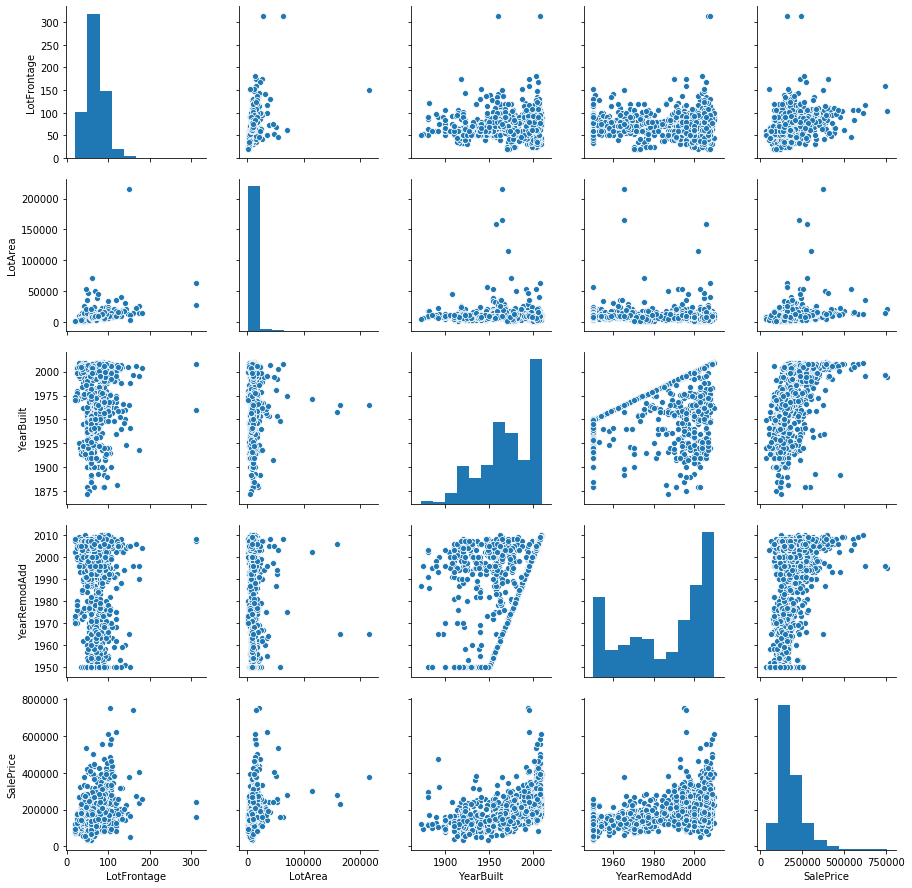

In [87]:
sns.pairplot(data, vars=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','SalePrice'])
plt.show()

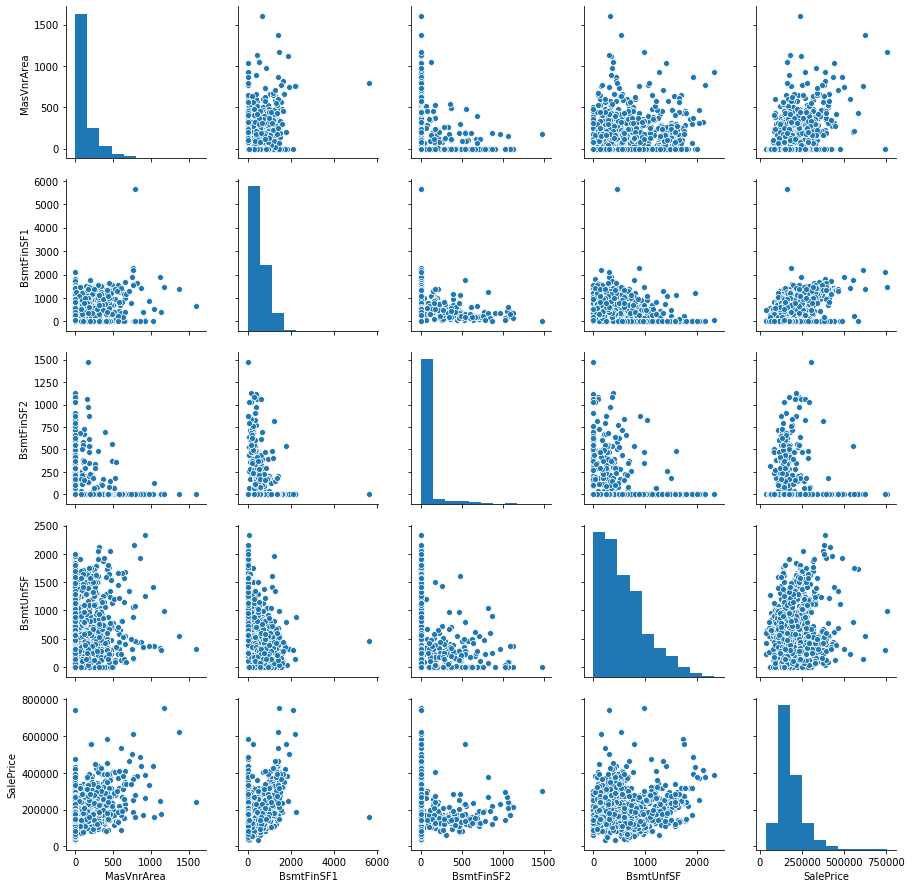

In [88]:
sns.pairplot(data, vars=['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','SalePrice'])
plt.show()

Checking if the numerical variables contain any outlier or not

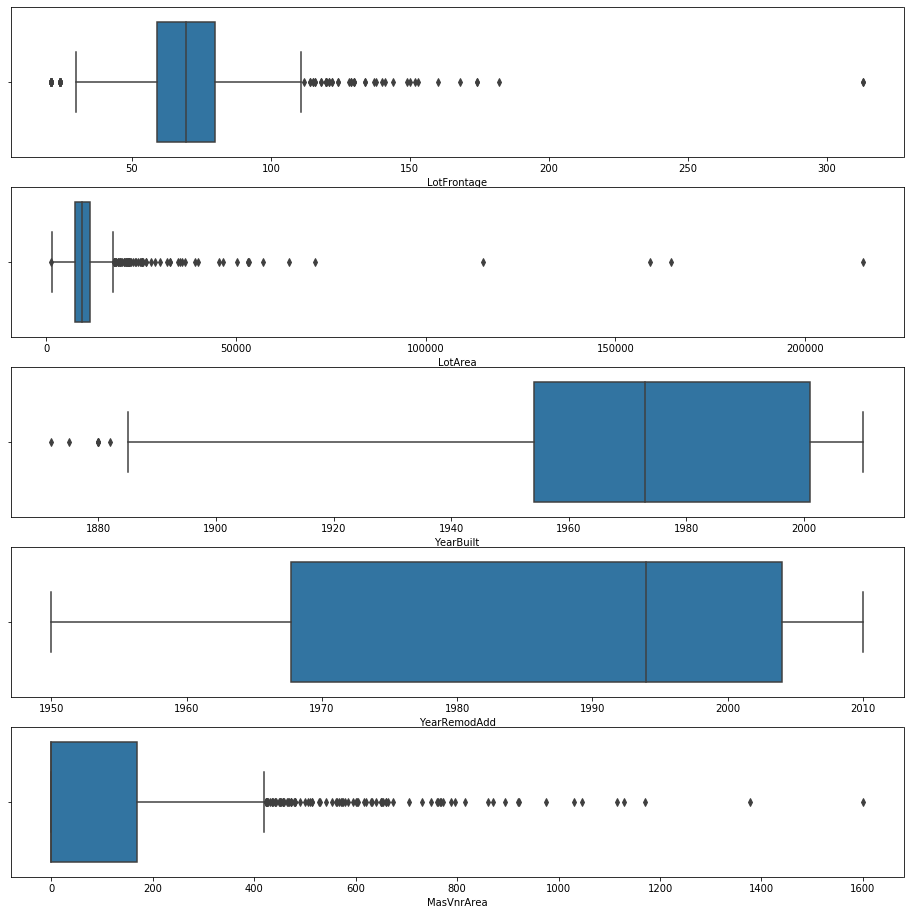

In [89]:
plt.figure(figsize=[16,16])
plt.subplot(511)
sns.boxplot(data['LotFrontage'])
plt.subplot(512)
sns.boxplot(data['LotArea'])
plt.subplot(513)
sns.boxplot(data['YearBuilt'])
plt.subplot(514)
sns.boxplot(data['YearRemodAdd'])
plt.subplot(515)
sns.boxplot(data['MasVnrArea'])
plt.show()

From the above box plots it is visible that there are variables that contain outliers.

#### Checking the distribution of the target variable and trying to understand it using distribution plot

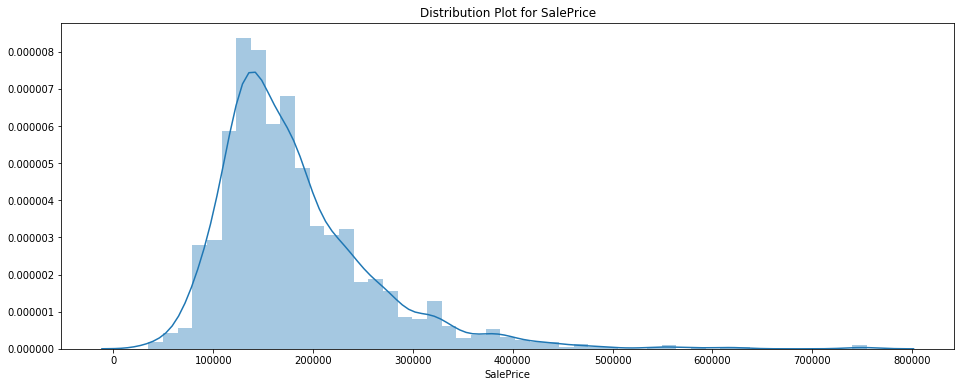

In [90]:
plt.figure(figsize=(16,6))
plt.title("Distribution Plot for SalePrice")
sns.distplot(data['SalePrice'])
plt.show()

From the above distribution plot, it is very clear that the data in variale SalePrice is not normally distributed. However, one of the few assumptions in regression is that the target variable is normally distributed. But here the distribution curve is right skewed i.e. not normally distributed.

From the above curve we can see that the most the data ranges between 50000 to 350000. After 350000, there are some outliers present in the target variable which we have to treat in some way to apply regression. If the curve is not converted into normally distributed curve, the basic assumption for regression does not stand true. 

Here, capping outliers or outliers removal won't work as if done so, the model will not predict the sale price for those houses correctly. Hence, we need to apply some other method to convert the distribution into a normal one. Also, if the target variable outliers are treated, no need to treat the outliers of the independent variables.

#### Visualising the categorical variables

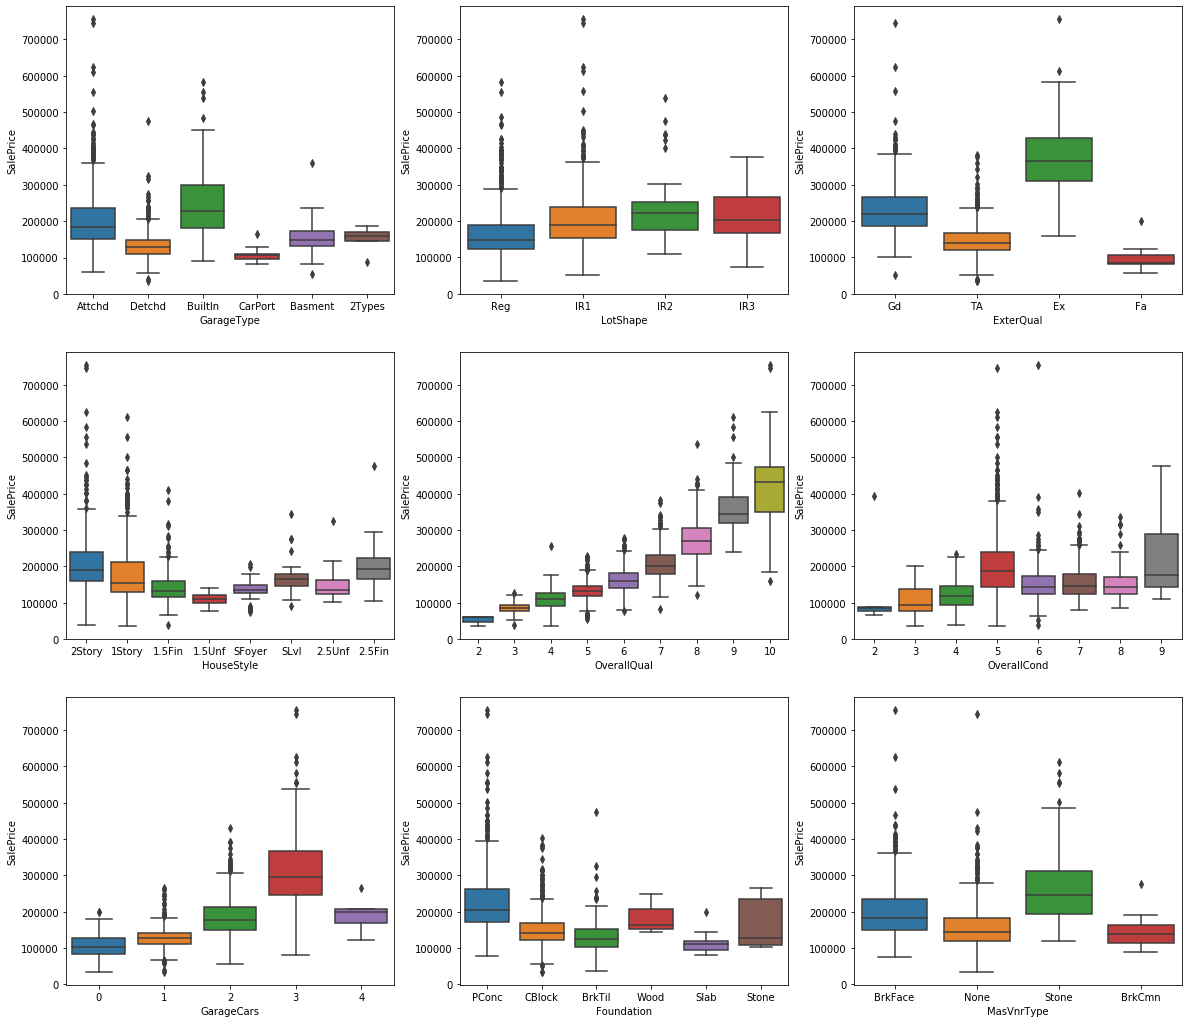

In [91]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = data)
plt.subplot(3,3,8)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = data)
plt.subplot(3,3,9)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = data)
plt.show()

From the above box plots, it is clear that, the categorical variables also influence the target variable. 

# Preparing the Data

Checking the missing values in the numerical variables

In [92]:
data[num_vars].isnull().sum()

LotFrontage      246
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageYrBlt       67
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
HalfBath           0
GarageCars         0
BedroomAbvGr       0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
YrSold             0
SalePrice          0
TotRmsAbvGrd       0
Fireplaces         0
dtype: int64

Seems two variables LotFrontage and GarageYrBlt contains some missing values

In [93]:
data[['LotFrontage','GarageYrBlt','MasVnrArea']].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1194.00000,1373.000000,1432.000000
mean,70.08459,1978.591406,104.895950
std,24.33991,24.701952,181.823951
min,21.00000,1900.000000,0.000000
25%,59.00000,1962.000000,0.000000
50%,69.50000,1980.000000,0.000000
75%,80.00000,2002.000000,168.000000
max,313.00000,2010.000000,1600.000000


From the above statistical features, we see that there is not much difference between mean and median for these two variables. Hence, we impute the missing values with mean.

In [94]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)

Checking the missing values again after imputing

In [95]:
data[num_vars].isnull().sum()

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
HalfBath         0
GarageCars       0
BedroomAbvGr     0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
YrSold           0
SalePrice        0
TotRmsAbvGrd     0
Fireplaces       0
dtype: int64

Checking for missing values in categorical variables

In [96]:
data[cat_vars].isnull().sum()

MSSubClass       0
LotShape         0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
Foundation       0
BsmtQual        24
BsmtExposure    25
BsmtFinType1    24
HeatingQC        0
KitchenQual      0
GarageType      67
GarageFinish    67
MoSold           0
dtype: int64

The categorical variables which contains missing values are:
- MasVnrType
- BsmtQual
- BsmtExposure
- BsmtFinType1
- GarageType
- GarageFinish

For field MasVnrType, missing values are imputed as None since no other value can be used in this case.

In [97]:
data['MasVnrType'].fillna('None', inplace=True)

For the field BsmtQual, there is a category NA which means no basement. Hence missing values are imputed with NA considering these houses do not have a basement.

In [98]:
data['BsmtQual'].fillna('NA', inplace=True)

For the field BsmtExposure, there is a category No which means no exposure. Hence missing values are imputed with No considering these houses do not have any exposure.

In [99]:
data['BsmtExposure'].fillna('No', inplace=True)

For the field BsmtFinType1, there is a category NA which means no basement. Hence missing values are imputed with NA considering these houses do not have any basement.

In [100]:
data['BsmtFinType1'].fillna('NA', inplace=True)

For the field GarageType, there is a category NA which means no garage. Hence missing values are imputed with NA considering these houses do not have any garage.

In [101]:
data['GarageType'].fillna('NA', inplace=True)

For the field GarageFinish, there is a category NA which means no garage. Hence missing values are imputed with NA considering these houses do not have any garage.

In [102]:
data['GarageFinish'].fillna('NA', inplace=True)

Now, after imputing all the missing values with logical values, lets check the null counts once again to confirm all nulls have been taken care of

In [103]:
data[cat_vars].isnull().sum()

MSSubClass      0
LotShape        0
Neighborhood    0
HouseStyle      0
OverallQual     0
OverallCond     0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
HeatingQC       0
KitchenQual     0
GarageType      0
GarageFinish    0
MoSold          0
dtype: int64

No variable now contain any null values. This is now a totally cleaned dataframe.

## Treating Categorical Variables

### Bucketing the categorical variables where there are more number of categories

Variable MSSubClass contains more number of categories. Hence, lower frequency categories have been bracketed into OT (others).

In [104]:
data['MSSubClass'] = data.MSSubClass.map({20:'1STNEW', 60:'2STNEW', 50:'1HFFIN', 30:'OTHERS', 40:'OTHERS', 45:'OTHERS', 70:'OTHERS', 75:'OTHERS', 80:'OTHERS', 85:'OTHERS', 90:'OTHERS', 120:'OTHERS', 150:'OTHERS', 160:'OTHERS', 180:'OTHERS', 190:'OTHERS'})

In [105]:
data.MSSubClass.value_counts(normalize=True)

1STNEW    0.365972
OTHERS    0.328472
2STNEW    0.206944
1HFFIN    0.098611
Name: MSSubClass, dtype: float64

In [106]:
data['Neighborhood'] = np.where(~(data['Neighborhood'].isin(['NAmes','CollgCr','OldTown','Edwards'])), "Others", data['Neighborhood'])

In [107]:
data.Neighborhood.value_counts(normalize=True)

Others     0.598611
NAmes      0.154167
CollgCr    0.104167
OldTown    0.077778
Edwards    0.065278
Name: Neighborhood, dtype: float64

In [108]:
data['HouseStyle'] = np.where(~(data['HouseStyle'].isin(['1Story','2Story','1.5Fin'])), "Others", data['HouseStyle'])

In [109]:
data.HouseStyle.value_counts(normalize=True)

1Story    0.494444
2Story    0.306250
1.5Fin    0.105556
Others    0.093750
Name: HouseStyle, dtype: float64

In [110]:
data['OverallQual'] = data.OverallQual.map({5:'Avg', 6:'AbvAvg', 7:'Good', 8:'VGood', 4:'BlwAvg', 2:'Others', 3:'Others', 10:'Others', 9:'Others'})

In [111]:
data.OverallQual.value_counts(normalize=True)

Avg       0.270833
AbvAvg    0.259028
Good      0.221528
VGood     0.116667
BlwAvg    0.075694
Others    0.056250
Name: OverallQual, dtype: float64

In [112]:
data['OverallCond'] = data.OverallCond.map({5:'Avg', 6:'AbvAvg', 7:'Good', 8:'VGood', 4:'BlwAvg', 2:'Others', 3:'Others', 10:'Others', 9:'Others'})

In [113]:
data.OverallCond.value_counts(normalize=True)

Avg       0.564583
AbvAvg    0.173611
Good      0.140278
VGood     0.049306
BlwAvg    0.038194
Others    0.034028
Name: OverallCond, dtype: float64

In [114]:
data['Exterior1st'] = np.where(~(data['Exterior1st'].isin(['VinylSd','HdBoard','MetalSd','Wd Sdng'])), "Others", data['Exterior1st'])

In [115]:
data.Exterior1st.value_counts(normalize=True)

VinylSd    0.354861
Others     0.201389
HdBoard    0.152778
MetalSd    0.150694
Wd Sdng    0.140278
Name: Exterior1st, dtype: float64

In [116]:
data['Exterior2nd'] = np.where(~(data['Exterior2nd'].isin(['VinylSd','HdBoard','MetalSd','Wd Sdng','Plywood'])), "Others", data['Exterior2nd'])

In [117]:
data.Exterior2nd.value_counts(normalize=True)

VinylSd    0.347917
MetalSd    0.146528
HdBoard    0.143056
Wd Sdng    0.134028
Others     0.132639
Plywood    0.095833
Name: Exterior2nd, dtype: float64

In [118]:
data['Foundation'] = np.where(~(data['Foundation'].isin(['PConc','CBlock','BrkTil'])), "Others", data['Foundation'])

In [119]:
data.Foundation.value_counts(normalize=True)

PConc     0.447917
CBlock    0.435417
BrkTil    0.100000
Others    0.016667
Name: Foundation, dtype: float64

In [120]:
data['BsmtQual'] = np.where(~(data['BsmtQual'].isin(['TA','Gd','Ex'])), "Others", data['BsmtQual'])

In [121]:
data.BsmtQual.value_counts(normalize=True)

TA        0.446528
Gd        0.429167
Ex        0.084028
Others    0.040278
Name: BsmtQual, dtype: float64

In [122]:
data['BsmtFinType1'] = np.where(~(data['BsmtFinType1'].isin(['Unf','GLQ','ALQ','BLQ'])), "Oth", data['BsmtFinType1'])

In [123]:
data.BsmtFinType1.value_counts(normalize=True)

Unf    0.297222
GLQ    0.289583
Oth    0.159722
ALQ    0.152083
BLQ    0.101389
Name: BsmtFinType1, dtype: float64

In [124]:
data['HeatingQC'] = np.where(~(data['HeatingQC'].isin(['Ex','TA','Gd'])), "OT", data['HeatingQC'])

In [125]:
data.HeatingQC.value_counts(normalize=True)

Ex    0.512500
TA    0.290972
Gd    0.163889
OT    0.032639
Name: HeatingQC, dtype: float64

In [126]:
data['GarageType'] = np.where(~(data['GarageType'].isin(['Attchd','Detchd','BuiltIn','NA'])), "OT", data['GarageType'])

In [127]:
data.GarageType.value_counts(normalize=True)

Attchd     0.602083
Detchd     0.266667
BuiltIn    0.061111
NA         0.046528
OT         0.023611
Name: GarageType, dtype: float64

In [128]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,61,0,0,0,0,0,2,2008,208500
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,298,0,0,0,0,0,0,5,2007,181500
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,42,0,0,0,0,0,9,2008,223500
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,35,272,0,0,0,0,2,2006,140000
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,192,84,0,0,0,0,0,12,2008,250000


### Creating dummy variables for the categorical columns after bucketing them and also removing one of the dummyfied variables

In [129]:
# Creating dummy variables for the variable 'MSSubClass'
df1 = pd.get_dummies(data['MSSubClass'], prefix='MSSubClass')
# Dropping MSSubClass_OTHERS column
df2 = df1.drop(['MSSubClass_OTHERS'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1HFFIN,MSSubClass_1STNEW,MSSubClass_2STNEW
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,0,0,2,2008,208500,0,0,1
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,0,0,0,5,2007,181500,0,1,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,0,0,0,9,2008,223500,0,0,1
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,0,0,2,2006,140000,0,0,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,0,0,0,12,2008,250000,0,0,1


In [130]:
#creating dummy variables for LotShape and dropping first column for efficiency
df2 = pd.get_dummies(data['LotShape'], prefix='LotShape', drop_first = True)
#concating df2 with the original dataframe
data = pd.concat([data,df2], axis=1)
#inspecting the dataframe to check if the changes were made successfully
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1HFFIN,MSSubClass_1STNEW,MSSubClass_2STNEW,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,2,2008,208500,0,0,1,0,0,1
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,5,2007,181500,0,1,0,0,0,1
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,9,2008,223500,0,0,1,0,0,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,2,2006,140000,0,0,0,0,0,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,12,2008,250000,0,0,1,0,0,0


In [131]:
# Creating dummy variables for the variable 'Neighborhood'
df1 = pd.get_dummies(data['Neighborhood'], prefix='Neighborhood')
# Dropping Neighborhood_Others column
df2 = df1.drop(['Neighborhood_Others'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,MSSubClass_1HFFIN,MSSubClass_1STNEW,MSSubClass_2STNEW,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,1,0,0,1,1,0,0,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,1,0,0,0,1,0,0,0,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,0,1,0,0,0,1,0,0,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,0,0,0,0,0,0,0,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,0,1,0,0,0,0,0,0,0


In [132]:
# Creating dummy variables for the variable 'HouseStyle'
df1 = pd.get_dummies(data['HouseStyle'], prefix='HouseStyle')
# Dropping HouseStyle_Others column
df2 = df1.drop(['HouseStyle_Others'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,1,1,0,0,0,0,0,1
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,0,1,0,0,0,0,0,1,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,0,0,1,0,0,0,0,0,1
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,0,0,0,0,0,0,0,1
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,0,0,0,0,0,0,0,0,1


In [133]:
# Creating dummy variables for the variable 'OverallQual'
df1 = pd.get_dummies(data['OverallQual'], prefix='OverallQual')
# Dropping OverallQual_Others column
df2 = df1.drop(['OverallQual_Others'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Neighborhood_NAmes,Neighborhood_OldTown,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallQual_AbvAvg,OverallQual_Avg,OverallQual_BlwAvg,OverallQual_Good,OverallQual_VGood
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,0,0,1,0,0,0,1,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,0,0,1,0,1,0,0,0,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,0,0,0,1,0,0,0,1,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,0,0,1,0,0,0,1,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,0,0,0,1,0,0,0,0,1


In [134]:
# Creating dummy variables for the variable 'OverallCond'
df1 = pd.get_dummies(data['OverallCond'], prefix='OverallCond')
# Dropping OverallCond_Others column
df2 = df1.drop(['OverallCond_Others'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OverallQual_AbvAvg,OverallQual_Avg,OverallQual_BlwAvg,OverallQual_Good,OverallQual_VGood,OverallCond_AbvAvg,OverallCond_Avg,OverallCond_BlwAvg,OverallCond_Good,OverallCond_VGood
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,0,1,0,0,1,0,0,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,1,0,0,0,0,0,0,0,0,1
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,0,0,1,0,0,1,0,0,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,0,1,0,0,1,0,0,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,0,0,0,1,0,1,0,0,0


In [135]:
# Creating dummy variables for the variable 'Exterior1st'
df1 = pd.get_dummies(data['Exterior1st'], prefix='Exterior1st')
# Dropping Exterior1st_Others column
df2 = df1.drop(['Exterior1st_Others'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OverallQual_VGood,OverallCond_AbvAvg,OverallCond_Avg,OverallCond_BlwAvg,OverallCond_Good,OverallCond_VGood,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,1,0,0,0,0,0,1,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,0,0,0,0,1,0,1,0,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,0,1,0,0,0,0,0,1,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,1,0,0,0,0,0,0,1
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,1,0,1,0,0,0,0,0,1,0


In [136]:
# Creating dummy variables for the variable 'Exterior2nd'
df1 = pd.get_dummies(data['Exterior2nd'], prefix='Exterior2nd')
# Dropping Exterior2nd_Others column
df2 = df1.drop(['Exterior2nd_Others'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OverallCond_VGood,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,1,0,1,0,0,0,1,0,0,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,0,0,1,0,0,0,0,1,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,0,0,1,0,0,0,0,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,0,0,1,0,0,0,0,1,0


In [137]:
#creating dummy variables for MasVnrType and dropping first column for efficiency
df2 = pd.get_dummies(data['MasVnrType'], prefix='MasVnrType', drop_first = True)
#concating df2 with the original dataframe
data = pd.concat([data,df2], axis=1)
#inspecting the dataframe to check if the changes were made successfully
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,1,0,0,0,0,1,0,1,0,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,1,0,0,0,0,1,0,1,0,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,1,0,0,0,0,0,0,1,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,1,0,0,0,0,1,0,1,0,0


In [138]:
#creating dummy variables for ExterQual and dropping first column for efficiency
df2 = pd.get_dummies(data['ExterQual'], prefix='ExterQual', drop_first = True)
#concating df2 with the original dataframe
data = pd.concat([data,df2], axis=1)
#inspecting the dataframe to check if the changes were made successfully
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,1,0,1,0,0,0,1,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,1,0,0,0,0,1,0,0,0,1
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,0,1,0,1,0,0,0,1,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,0,0,0,1,0,0,0,1
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,0,1,0,1,0,0,0,1,0


In [139]:
# Creating dummy variables for the variable 'Foundation'
df1 = pd.get_dummies(data['Foundation'], prefix='Foundation')
# Dropping Foundation_Others column
df2 = df1.drop(['Foundation_Others'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,1,0,0,0,1,0,0,0,1
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,0,1,0,0,0,1,0,1,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,1,0,0,0,1,0,0,0,1
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,1,0,0,0,1,1,0,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,1,0,0,0,1,0,0,0,1


In [140]:
# Creating dummy variables for the variable 'BsmtQual'
df1 = pd.get_dummies(data['BsmtQual'], prefix='BsmtQual')
# Dropping BsmtQual_Others column
df2 = df1.drop(['BsmtQual_Others'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,1,0,0,0,1,0,1,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,0,0,1,0,1,0,0,1,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,0,1,0,0,0,1,0,1,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,0,1,1,0,0,0,0,1
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,0,1,0,0,0,1,0,1,0


In [141]:
#creating dummy variables for BsmtExposure and dropping first column for efficiency
df2 = pd.get_dummies(data['BsmtExposure'], prefix='BsmtExposure', drop_first = True)
#concating df2 with the original dataframe
data = pd.concat([data,df2], axis=1)
#inspecting the dataframe to check if the changes were made successfully
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,0,1,0,1,0,0,0,1
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,1,0,1,0,0,1,0,1,0,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,0,0,1,0,1,0,0,1,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,1,1,0,0,0,0,1,0,0,1
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,0,0,1,0,1,0,0,0,0


In [142]:
#creating dummy variables for BsmtFinType1 and dropping first column for efficiency
df2 = pd.get_dummies(data['BsmtFinType1'], prefix='BsmtFinType1', drop_first = True)
#concating df2 with the original dataframe
data = pd.concat([data,df2], axis=1)
#inspecting the dataframe to check if the changes were made successfully
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Oth,BsmtFinType1_Unf
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,1,0,0,0,1,0,1,0,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,1,0,1,0,0,0,0,0,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,1,0,0,1,0,0,1,0,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,1,0,0,1,0,0,0,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,1,0,0,0,0,0,1,0,0


In [143]:
# Creating dummy variables for the variable 'HeatingQC'
df1 = pd.get_dummies(data['HeatingQC'], prefix='HeatingQC')
# Dropping HeatingQC_OT column
df2 = df1.drop(['HeatingQC_OT'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Oth,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,0,1,0,1,0,0,1,0,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,1,0,0,0,0,0,0,1,0,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,1,0,0,1,0,0,1,0,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,1,0,0,0,0,0,1,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,0,0,0,1,0,0,1,0,0


In [144]:
#creating dummy variables for KitchenQual and dropping first column for efficiency
df2 = pd.get_dummies(data['KitchenQual'], prefix='KitchenQual', drop_first = True)
#concating df2 with the original dataframe
data = pd.concat([data,df2], axis=1)
#inspecting the dataframe to check if the changes were made successfully
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Oth,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,1,0,0,1,0,0,0,1,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,0,0,0,1,0,0,0,0,1
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,1,0,0,1,0,0,0,1,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,0,0,0,0,1,0,0,1,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,1,0,0,1,0,0,0,1,0


In [145]:
# Creating dummy variables for the variable 'GarageType'
df1 = pd.get_dummies(data['GarageType'], prefix='GarageType')
# Dropping GarageType_OT column
df2 = df1.drop(['GarageType_OT'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,1,0,0,0,1,0,1,0,0,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,1,0,0,0,0,1,1,0,0,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,1,0,0,0,1,0,1,0,0,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,1,0,0,1,0,0,0,1,0
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,1,0,0,0,1,0,1,0,0,0


In [146]:
# Creating dummy variables for the variable 'GarageFinish'
df1 = pd.get_dummies(data['GarageFinish'], prefix='GarageFinish')
# Dropping GarageFinish_NA column
df2 = df1.drop(['GarageFinish_NA'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,df2], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,2STNEW,65.0,8450,Reg,CollgCr,2Story,Good,Avg,2003,...,0,1,0,1,0,0,0,0,1,0
1,2,1STNEW,80.0,9600,Reg,Others,1Story,AbvAvg,VGood,1976,...,0,0,1,1,0,0,0,0,1,0
2,3,2STNEW,68.0,11250,IR1,CollgCr,2Story,Good,Avg,2001,...,0,1,0,1,0,0,0,0,1,0
3,4,OTHERS,60.0,9550,IR1,Others,2Story,Good,Avg,1915,...,0,1,0,0,0,1,0,0,0,1
4,5,2STNEW,84.0,14260,IR1,Others,2Story,VGood,Avg,2000,...,0,1,0,1,0,0,0,0,1,0


### Dropping the original categorical columns for which dummy variables have been created

In [147]:
# Dropping the original columns for which dummies have been created
drop_columns = ['MSSubClass','LotShape','Neighborhood','HouseStyle','OverallQual','OverallCond','Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','GarageType','GarageFinish']

data = data.drop(drop_columns, axis=1)
data.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,1,0,1,0,0,0,0,1,0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,0,1,1,0,0,0,0,1,0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,1,0,1,0,0,0,0,1,0
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,1,0,0,0,1,0,0,0,1
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,1,0,1,0,0,0,0,1,0


Also dropping the vriable 'MoSold' since this column doesn't add any value towards the model building

In [148]:
data = data.drop('MoSold', axis=1)
data.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,1,0,1,0,0,0,0,1,0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,0,1,1,0,0,0,0,1,0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,1,0,1,0,0,0,0,1,0
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,1,0,0,0,1,0,0,0,1
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,1,0,1,0,0,0,0,1,0


The variables 'YearBuilt', 'YrSold' and 'YearRemodAdd' contains the year on which it has been built, sold to the customers and was remodeled respectively. Hence, we derive the build_age, sell_age and remodel_age of the house.

In [149]:
data['Build_Age'] = (2020 - data['YearBuilt'])
data['Sale_Age'] = (2020 - data['YrSold'])
data['Remodel_Age'] = (2020 - data['YearRemodAdd'])
data.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Build_Age,Sale_Age,Remodel_Age
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,1,0,0,0,0,1,0,17,12,17
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,1,0,0,0,0,1,0,44,13,44
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,1,0,0,0,0,1,0,19,12,18
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,0,1,0,0,0,1,105,14,50
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,1,0,0,0,0,1,0,20,12,20


Now dropping the original YrSold column as it is no longer required for analysis purpose

In [150]:
data = data.drop(['YearBuilt','YrSold','YearRemodAdd'], axis=1)
data.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Build_Age,Sale_Age,Remodel_Age
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1,0,0,0,0,1,0,17,12,17
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1,0,0,0,0,1,0,44,13,44
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1,0,0,0,0,1,0,19,12,18
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,0,0,1,0,0,0,1,105,14,50
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,1,0,0,0,0,1,0,20,12,20


Now, in the independent variables, as we saw earlier, there were some outliers and also in the target variable, because of the outliers, the distribution was not normal. So, if we take care of the outliers for the target variable, we won't need to take care of the independent variables' outliers any more. Hence, we transform the target variable SalePrice.

Since we cannot drop the outliers nor we can cap them, we can apply log transformation to the values so that they become normally distributed.

In [151]:
data['SalePrice'] = np.log(data['SalePrice'])

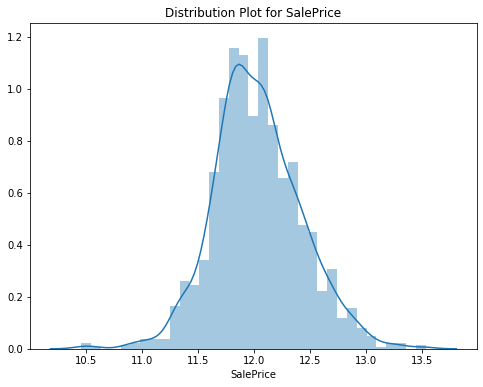

In [152]:
plt.figure(figsize=(8,6))
plt.title("Distribution Plot for SalePrice")
sns.distplot(data['SalePrice'])
plt.show()

Now, after transformation, we can see that the distribution is now normal. So, now we don't need to remode/drop any value from the target variable.

# Model Building

Now, we split the data into X and y

In [153]:
surprise = data.drop('Id',axis=1)
X = surprise.drop('SalePrice',axis=1)
y = surprise['SalePrice']

#### Train-Test Split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1152, 95)
(288, 95)
(1152,)
(288,)


#### Feature Scaling for numerical variables

In [156]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 528 to 802
Data columns (total 95 columns):
LotFrontage             1152 non-null float64
LotArea                 1152 non-null int64
MasVnrArea              1152 non-null float64
BsmtFinSF1              1152 non-null int64
BsmtFinSF2              1152 non-null int64
BsmtUnfSF               1152 non-null int64
TotalBsmtSF             1152 non-null int64
1stFlrSF                1152 non-null int64
2ndFlrSF                1152 non-null int64
LowQualFinSF            1152 non-null int64
GrLivArea               1152 non-null int64
BsmtFullBath            1152 non-null int64
BsmtHalfBath            1152 non-null int64
FullBath                1152 non-null int64
HalfBath                1152 non-null int64
BedroomAbvGr            1152 non-null int64
TotRmsAbvGrd            1152 non-null int64
Fireplaces              1152 non-null int64
GarageYrBlt             1152 non-null float64
GarageCars              1152 non-null int64
Garage

In [157]:
X_num_vars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','Build_Age','Sale_Age','Remodel_Age']

In [158]:
from sklearn.preprocessing import StandardScaler

#Creating the scaler object
scaler = StandardScaler()

#Applying the scaler object on the numeric variables of the train dataframe
X_train[X_num_vars] = scaler.fit_transform(X_train[X_num_vars])
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Build_Age,Sale_Age,Remodel_Age
528,-0.531324,-0.143121,-0.579117,-0.214453,-0.292619,-0.897948,-1.257584,-1.454469,-0.815343,-0.115404,...,0,0,0,1,0,0,0,1.694711,0.624695,-0.803408
1155,0.883460,0.010427,-0.579117,1.545934,-0.292619,-0.667607,0.872184,0.725072,-0.815343,-0.115404,...,1,0,0,0,0,1,0,-0.146251,0.624695,-0.900633
109,1.546639,0.100809,2.167212,0.562380,-0.292619,1.311022,1.825777,1.791266,-0.815343,-0.115404,...,1,0,0,0,0,1,0,-0.179125,-1.624207,0.411895
751,0.002960,-0.267063,-0.579117,-0.971703,-0.292619,0.207689,-0.948311,-1.310389,0.707229,-0.115404,...,1,0,0,0,1,0,0,-1.033857,0.624695,-0.852020
461,-0.442900,-0.317633,-0.579117,-0.210101,0.978120,-1.312561,-1.182609,-1.533058,0.476537,-0.115404,...,0,0,1,0,0,1,0,1.168722,-0.874573,-1.046469


## Ridge and Lasso Regression

### Ridge Regression

Using RFE to select top 50 variables

In [159]:
#RFE

ridge = Ridge()
rfe = RFE(ridge,50)
rfe = rfe.fit(X_train,y_train)

In [160]:
cols = X_train.columns[rfe.support_]
X_train_rfe_ridge = X_train[cols]

Hyperparameter tuning using different values of alpha(or lambda). Using GridSearchCV for folds to determine the optimum value of alpha.

In [161]:
# list of alphas to tune
params_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params_ridge, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe_ridge, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [162]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006249,0.007654,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.099301,-0.104373,-0.115510,-0.101071,...,-0.105700,0.005778,23,-0.100491,-0.098204,-0.097250,-0.099264,-0.093977,-0.097837,0.002212
1,0.000000,0.000000,0.003124,0.006248,0.001,{'alpha': 0.001},-0.099300,-0.104373,-0.115508,-0.101070,...,-0.105699,0.005778,22,-0.100491,-0.098203,-0.097250,-0.099264,-0.093977,-0.097837,0.002212
2,0.000000,0.000000,0.006249,0.007654,0.01,{'alpha': 0.01},-0.099294,-0.104373,-0.115488,-0.101061,...,-0.105693,0.005774,21,-0.100492,-0.098203,-0.097249,-0.099263,-0.093977,-0.097837,0.002212
3,0.000000,0.000000,0.000000,0.000000,0.05,{'alpha': 0.05},-0.099268,-0.104373,-0.115398,-0.101024,...,-0.105665,0.005756,20,-0.100497,-0.098200,-0.097248,-0.099258,-0.093977,-0.097836,0.002212
4,0.003125,0.006250,0.003123,0.006247,0.1,{'alpha': 0.1},-0.099237,-0.104374,-0.115287,-0.100979,...,-0.105630,0.005734,19,-0.100504,-0.098197,-0.097246,-0.099252,-0.093977,-0.097835,0.002213


Plotting the curves of both Train and Test mean scores for differnt values of alpha

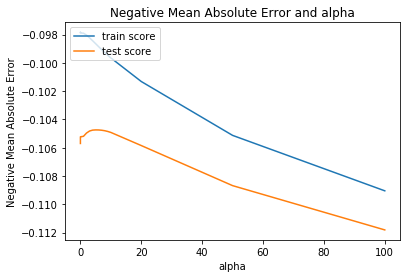

In [163]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above plots, we can determine the optimum value for alpha is about 10.

Hence, getting the values of the coefficients of the variables for alpha = 10

In [164]:
model_cv.best_params_['alpha']

5.0

In [165]:
ridge_alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=ridge_alpha)

ridge.fit(X_train_rfe_ridge, y_train)
ridge.coef_

array([ 0.02517942,  0.04743358,  0.07070111,  0.08974764,  0.02890151,
        0.05888526,  0.04488885,  0.05997724, -0.15177671, -0.07871484,
       -0.06081781, -0.05068976, -0.04789507, -0.02858099, -0.07519222,
        0.03738298,  0.08718613,  0.07140704,  0.02275609, -0.05563357,
        0.1083301 ,  0.10917975,  0.03008091, -0.02796814,  0.04505396,
        0.01972935,  0.0209472 ,  0.04620349, -0.15166251, -0.05892784,
       -0.08864916,  0.06327857,  0.04576328,  0.0776017 ,  0.14740011,
        0.05449586,  0.02915883,  0.07525873, -0.04260627, -0.07756199,
        0.03272676, -0.11483601, -0.08988107, -0.11371705,  0.08176614,
        0.06409603,  0.05244878, -0.02801322, -0.04301592, -0.02890356])

Using the ridge model to predict the target variable for the training set

In [166]:
y_train_pred_ridge = ridge.predict(X_train_rfe_ridge)

The R-squared value for training set is as below:

In [167]:
from sklearn.metrics import r2_score

ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
print(ridge_train_r2)

0.861607911396244


Applying the scaler object on the numeric variables of the test dataframe

In [168]:
#Applying the scaler object on the numeric variables of the test dataframe
X_test[X_num_vars] = scaler.transform(X_test[X_num_vars])
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Build_Age,Sale_Age,Remodel_Age
1339,2.209819,-0.100643,-0.579117,-0.188341,-0.292619,-0.151643,-0.470343,-0.775982,-0.815343,-0.115404,...,1,0,0,0,0,1,0,-0.014753,1.374329,0.654956
242,-0.310264,-0.519913,-0.579117,-0.971703,-0.292619,-0.068720,-1.229468,-0.710491,0.455774,-0.115404,...,1,0,0,0,0,0,1,2.352198,1.374329,1.724422
1221,-0.663960,-0.221091,-0.579117,-0.427702,2.684541,-0.828845,-0.264161,0.133033,-0.815343,-0.115404,...,1,0,0,0,0,0,1,0.116744,-0.124939,0.849404
744,-1.282927,-0.483594,-0.579117,0.623308,-0.292619,0.078698,0.637886,0.463108,-0.815343,-0.115404,...,1,0,0,0,0,1,0,-0.705114,-0.124939,-0.365899
479,-0.885020,-0.434863,1.909744,-0.606134,-0.292619,0.389658,-0.369595,-0.076538,-0.815343,-0.115404,...,0,0,1,0,0,0,1,1.135848,0.624695,-0.706184


In [169]:
X_test_rfe_ridge = X_test[cols]

#### Predicting the target variale with this model

In [170]:
y_test_pred_ridge = ridge.predict(X_test_rfe_ridge)

In [171]:
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)
print(ridge_test_r2)

0.8480711238064437


Above is the R-squared value for the test set using Ridge model

Based on the coefficients we get from the above model, the top 10 variables that are significant in predicting the price of the houses are as below:
- LotShape_IR3
- ExterQual_Fa
- BsmtQual_Ex
- KitchenQual_Fa
- KitchenQual_TA
- OverallCond_VGood
- OverallCond_Good
- KitchenQual_Gd
- GrLivArea
- ExterQual_TA

Also the model that we got is as below:

#### Sale Proce of the house = (-0.15177671 * LotShape_IR3) + (-0.15166251 * ExterQual_Fa) + (0.14740011 * BsmtQual_Ex) + (-0.11483601 * KitchenQual_Fa) + (-0.11371705 * KitchenQual_TA) + (0.10917975 * OverallCond_VGood) + (0.1083301 * OverallCond_Good) + (-0.08988107 * KitchenQual_Gd) + (0.08974764 * GrLivArea) + (-0.08864916 * ExterQual_TA)

## Lasso

Selecting the same features for Lasso regularization

In [172]:
X_train_rfe_lasso = X_train[cols]

Selecting different set of alpha values for Lasso 

In [173]:
# list of alphas to tune
params_lasso = {'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}

Hyperparameter tuning using different values of alpha(or lambda). Using GridSearchCV for folds to determine the optimum value of alpha.

In [174]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe_lasso, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [175]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016471,0.001172,0.003922,5.950479e-03,1e-05,{'alpha': 1e-05},-0.099250,-0.104375,-0.115402,-0.101072,...,-0.105674,0.005755,2,-0.100507,-0.098193,-0.097261,-0.099251,-0.093963,-0.097835,0.002218
1,0.015957,0.002092,0.000997,3.873843e-07,5e-05,{'alpha': 5e-05},-0.099261,-0.104538,-0.115010,-0.101211,...,-0.105671,0.005598,1,-0.100636,-0.098233,-0.097349,-0.099253,-0.093994,-0.097893,0.002236
2,0.021742,0.002035,0.001995,8.914302e-04,0.0001,{'alpha': 0.0001},-0.099371,-0.104730,-0.114613,-0.101408,...,-0.105710,0.005411,3,-0.100835,-0.098292,-0.097483,-0.099321,-0.094117,-0.098009,0.002245
3,0.016154,0.003961,0.001204,4.111771e-04,0.0005,{'alpha': 0.0005},-0.100082,-0.105865,-0.114055,-0.101341,...,-0.106507,0.005432,4,-0.102494,-0.099407,-0.098931,-0.100849,-0.096221,-0.099580,0.002090
4,0.014753,0.004144,0.001198,3.986359e-04,0.001,{'alpha': 0.001},-0.100395,-0.106875,-0.113884,-0.101355,...,-0.107463,0.006052,5,-0.104333,-0.101327,-0.101097,-0.103165,-0.099254,-0.101835,0.001759


Plotting the curves of both Train and Test mean scores for differnt values of alpha

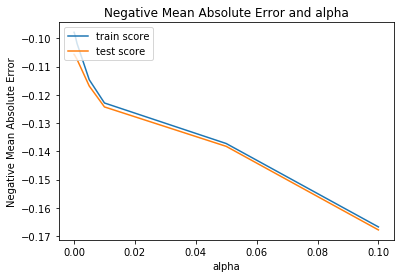

In [176]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Below is the best value of alpha suggested by the model itself


In [177]:
model_cv.best_params_['alpha']

5e-05

In [178]:
alpha_lasso = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_rfe_lasso, y_train)

Lasso(alpha=5e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Coefficients for the variables for Lasso model

In [179]:
lasso.coef_

array([ 0.0275625 ,  0.03943794,  0.0687528 ,  0.09592387,  0.02747418,
        0.05723068,  0.07107784,  0.06172707, -0.23535851, -0.08134769,
       -0.06494533, -0.08591261, -0.0587278 , -0.02892279, -0.0755214 ,
        0.04353964,  0.09413814,  0.09756155,  0.04995312, -0.02451014,
        0.13825896,  0.14167509,  0.02888428, -0.03153405,  0.04807176,
        0.04030437,  0.04425231,  0.06485641, -0.26852804, -0.10215931,
       -0.13593101,  0.09595309,  0.07745658,  0.10829955,  0.16202907,
        0.07170704,  0.03931951,  0.0778359 , -0.03959764, -0.07706611,
        0.03008929, -0.13970638, -0.10180606, -0.1261244 ,  0.08749883,
        0.07184503,  0.05765912, -0.02787702, -0.03845475, -0.02553605])

Using the Lasso model to predict the target variable for the training set

In [180]:
y_train_pred_lasso = lasso.predict(X_train_rfe_lasso)

The R-squared value for training set is as below:

In [181]:
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
print(lasso_train_r2)

0.8637582415551325


In [182]:
X_test_rfe_lasso= X_test[cols]

#### Predicting the target variale with Lasso model

In [183]:
y_test_pred_lasso = lasso.predict(X_test_rfe_lasso)

In [184]:
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)
print(lasso_test_r2)

0.8447106871784291


Above is the R-squared value for the test set using Ridge model

Based on the coefficients we get from the above model, the top 10 variables that are significant in predicting the price of the houses are as below:

- ExterQual_Fa
- LotShape_IR3
- BsmtQual_Ex
- OverallCond_VGood
- KitchenQual_Fa
- OverallCond_Good
- ExterQual_TA
- KitchenQual_TA
- Foundation_PConc
- ExterQual_Gd

Also the model that we got is as below:

#### (-0.26852804 * ExterQual_Fa) + (-0.23535851 * LotShape_IR3) + (0.16202907 * BsmtQual_Ex) + (0.14167509 * OverallCond_VGood) + (-0.13970638 * KitchenQual_Fa) + (0.13825896 * OverallCond_Good) + (-0.13593101 * ExterQual_TA) + (-0.1261244 * KitchenQual_TA) + (0.10829955 * Foundation_PConc) + (-0.10215931 * ExterQual_Gd)